# Comparisons and analysis

This notebook is for getting the simulated data done on the cluster and then doing funky comparisons and analysis

In [24]:
# First Import the packages.
from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *
import numpy as np
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib.colors import ListedColormap
from turbo_colormap import *
from scipy import stats
#matplotlib.style.use('ggplot')
import inspect
import os
import csv 
import time

import glob
import pandas as pd

# Now Import our data from our data folder:

# Get all csv filenames in a folder
all_files = glob.glob("do-not-track/*.csv")
#all_files

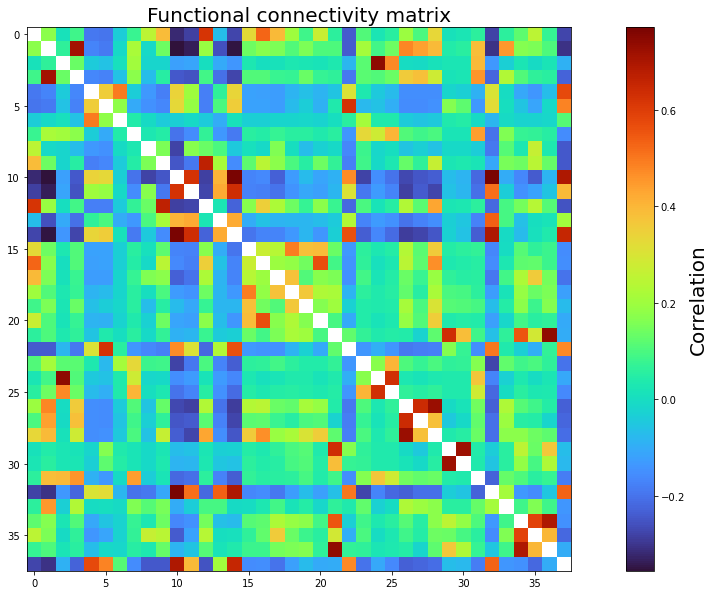

In [2]:
# Import Experimental Mouse Data FCM
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")

# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

cs=plt.imshow(FCM_exp, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])

# Building Heterogeneous Array for w_ei

In [42]:
df = pd.read_csv("CortexDensities.csv",delimiter=",")
w_ei = (df.excitatory/df.inhibitory).values
w_ei

array([ 9.17442382,  5.08540195,  5.05812477,  3.66632936,  7.38033999,
        5.08694342,  8.14050163,  0.24338338, 12.18532528, 10.64470066,
        8.55142668,  8.38734783, 10.00472368,  9.82527629, 10.17119956,
        8.14764529,  7.96679667, 10.55151627, 11.94557097,  8.1733871 ,
        4.35714067,  9.02902001,  8.12392941,  5.88335244,  4.18433264,
        4.55189384,  5.45023491,  3.96110152,  6.65769399,  6.16826812,
        6.75938852,  4.78803646,  7.42233311,  4.81086775, 11.23678647,
       11.09108295, 10.75333413,  9.0480338 ])

In [40]:
w_ie = 1 / w_ei
w_ie

array([0.10899867, 0.19664129, 0.19770173, 0.27275236, 0.13549511,
       0.1965817 , 0.12284255, 4.10874398, 0.08206593, 0.09394346,
       0.11693955, 0.1192272 , 0.09995279, 0.10177831, 0.09831682,
       0.12273485, 0.12552096, 0.09477311, 0.08371303, 0.1223483 ,
       0.22950831, 0.11075399, 0.12309314, 0.16997112, 0.23898674,
       0.21968878, 0.18347833, 0.25245503, 0.15020216, 0.16212006,
       0.14794238, 0.20885388, 0.13472853, 0.20786271, 0.08899341,
       0.09016252, 0.09299441, 0.11052125])

# Scorr of Empirical (Experimental) FCM vs SCM of Connectome

This gives a baseline of what the minimum correlation should be like. 

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


Text(0.05, 0.95, 'SpearmanrResult(correlation=0.3936670530573764, pvalue=2.4789217444587726e-53)')

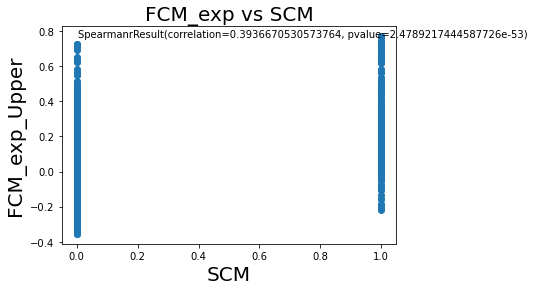

In [31]:
# Import Experimental Mouse Data FCM
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")
# Simualted FCM
#FCM_sim = np.genfromtxt(all_files[4],delimiter="\t")
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "MouseCortex"

con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Set SCM as Binary
con.weights = con.weights!=0
SCM = con.weights

# Comparing FC_experimental Vs SCM with Spearman Correlation

# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)
np.fill_diagonal(SCM,np.nan)
# Check if SCM is symmetric: 
Sym_check = numpy.allclose(SCM, SCM.T,equal_nan=True)
if Sym_check == True:
    # Grab Upper triangles
    FCM_Upper = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
    SCM_Upper = SCM[np.triu_indices(FCM_sim.shape[0], k = 1)]

elif Sym_check == False:
    # If SCM is not symmetric, need to calcualte spearman corr for entire matrix.
    # Remove all Nans for SCM and FCM
    SCM_Upper = SCM[~numpy.isnan(SCM)]
    FCM_Upper = FCM_exp[~numpy.isnan(FCM_exp)]


# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Upper,b=SCM_Upper)
#print(SCorr)

# Scatterplot
plt.scatter(SCM_Upper,FCM_Upper)
plt.xlabel('SCM', fontsize=20)
plt.ylabel('FCM_exp', fontsize=20)
plt.title('FCM_exp vs SCM', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')

# Comparison of SCorr vs Selected Variable (G = Coupling constant)

 

In [24]:
# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("do-not-track/G[*SCorr*.csv")

SCorr_array = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in Scorr_files:
    a = np.genfromtxt(item)
    SCorr_array.append(a[0])

print(SCorr_array)
print(numpy.amax(SCorr_array))
print(numpy.where(SCorr_array==np.amax(SCorr_array)))

# Check File order. 
# print(Scorr_files)

[0.25183795471951126, 0.2716272443899898, 0.29204315531686226, 0.31281840483691375, 0.333216795291562, 0.35477203979431643, 0.3739609898503382, 0.3935377459498965, 0.4100470845685042, 0.42520236143847795, 0.4341526717398768, 0.2749816864385517, 0.30010610412311794, 0.48629892607785286, 0.5034633783887296, 0.5062306434612244, 0.50131179631745, 0.49693194706282307, 0.49477379783371733, 0.4976768764439313, 0.5002732477541347, 0.5002776389723986, 0.4966471188390143, 0.4920569370305489, 0.4876025815125727, 0.48078632305973895, 0.4724713930357501, 0.46322751028092374, 0.45432977563759275, 0.4437164720837825, 0.434023408157803, 0.42337067337347284, 0.4132437720203275, 0.40277945852820274, 0.39188353058552944, 0.3811365785986572, 0.3694672063934634, 0.35788109273706836, 0.34684931467121366, 0.33679254504508255]
0.5062306434612244
(array([15], dtype=int64),)


Text(0.5, 1.0, 'Scorr vs G (of FC vs SC)')

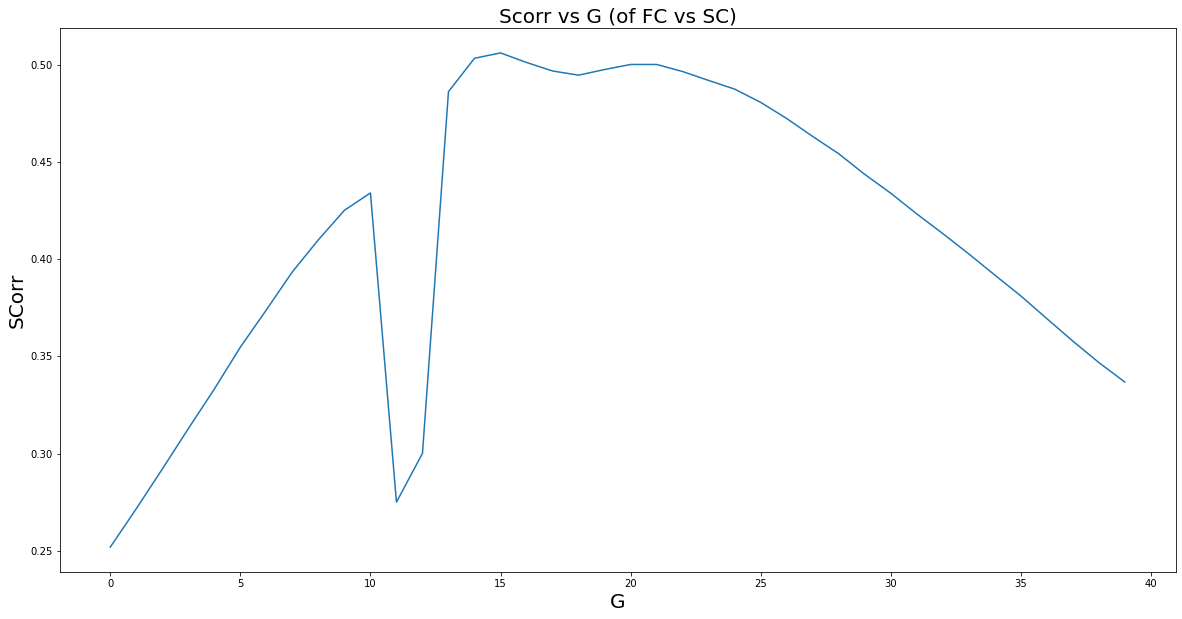

In [26]:
# Graph it: 
plt.plot(SCorr_array)
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)

In [38]:
# Scorr of FCM_exp vs FCM_sim vs G parameter

# Get FCM files
FCM_files = glob.glob("do-not-track/G[*FCM*.csv")

# FCM_files

0.41284286679023513
(array([26], dtype=int64),)


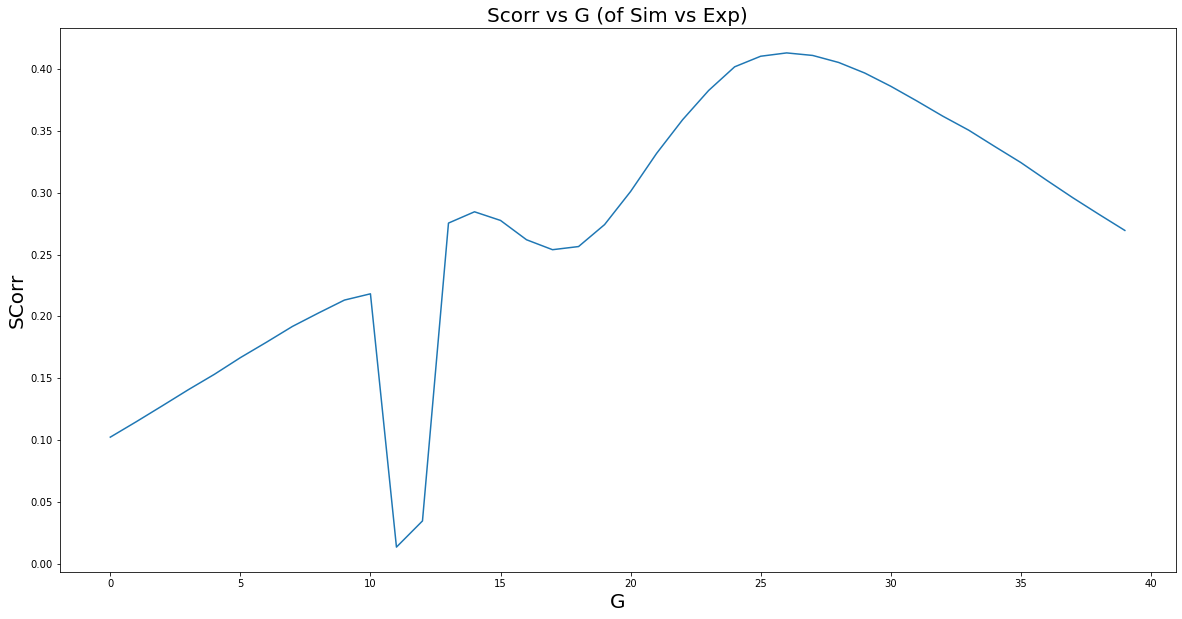

In [45]:
# Calcualte SCorr of FCM_sim vs FCM_exp

# FCM_exp
FCM_exp = np.genfromtxt('do-not-track\\FCM_MouseExperimental.csv',delimiter = "\t")
# Set diagonals to NaN
np.fill_diagonal(FCM_exp,np.nan)

# Comparing FC_experimental Vs FC_Simulation with Spearman Correlation

SCorr_esim = []

FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]  


for item in FCM_files:
    FCM_sim = np.genfromtxt(item)
    FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]      

    # Spearman Correlation
    SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
    SCorr_esim.append(SCorr[0])

# Graph it: 
plt.plot(SCorr_esim)
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)

print(numpy.amax(SCorr_esim))
print(numpy.where(SCorr_esim==np.amax(SCorr_esim)))

# Looking at a simulation run

In [10]:
# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/HeunNoBOLD*.csv")
Sim_run_files

['do-not-track\\HeunNoBOLD_MouseCortex_FCM_20200702-021125_.csv',
 'do-not-track\\HeunNoBOLD_MouseCortex_Params_20200702-021125_.csv',
 'do-not-track\\HeunNoBOLD_MouseCortex_Scorr_20200702-021125_.csv',
 'do-not-track\\HeunNoBOLD_MouseCortex_Tseries_20200702-021125_.csv']

In [13]:
# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

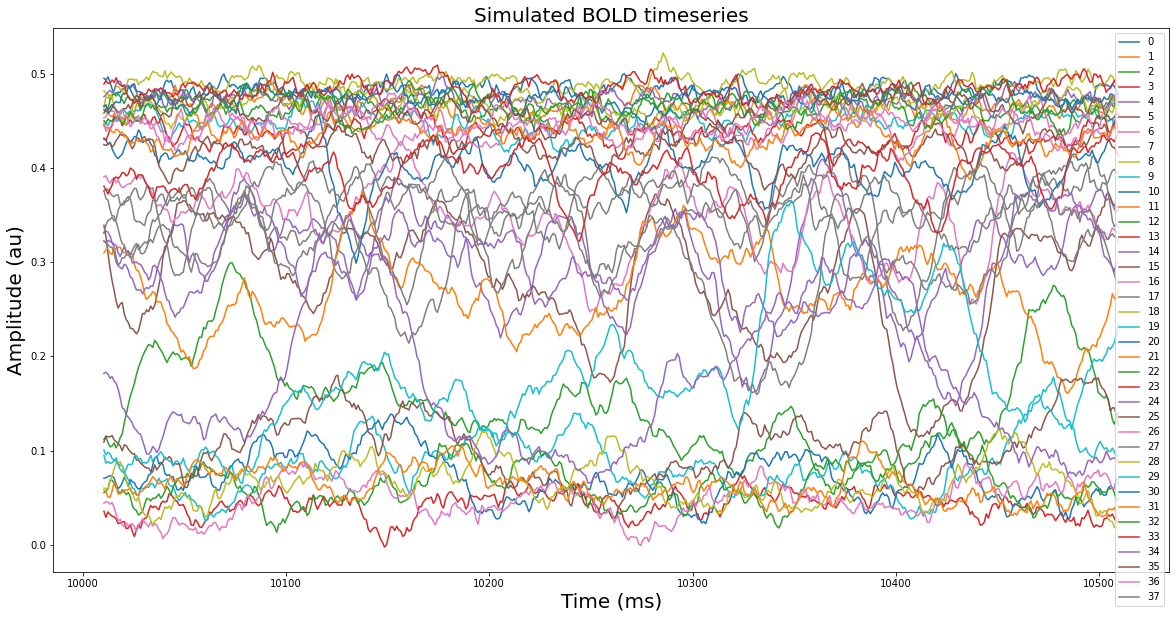

In [19]:
# plt.subplots()

#plt.figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')
for tseries in bold_data:
    plt.plot(bold_time[10000:10500],tseries[10000:10500])

plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Amplitude (au)', fontsize=20)
plt.title('Simulated BOLD timeseries', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))

In [15]:
Scorra = np.genfromtxt(Sim_run_files[-2])
Scorra

array([5.74088692e-001, 4.62519164e-124])

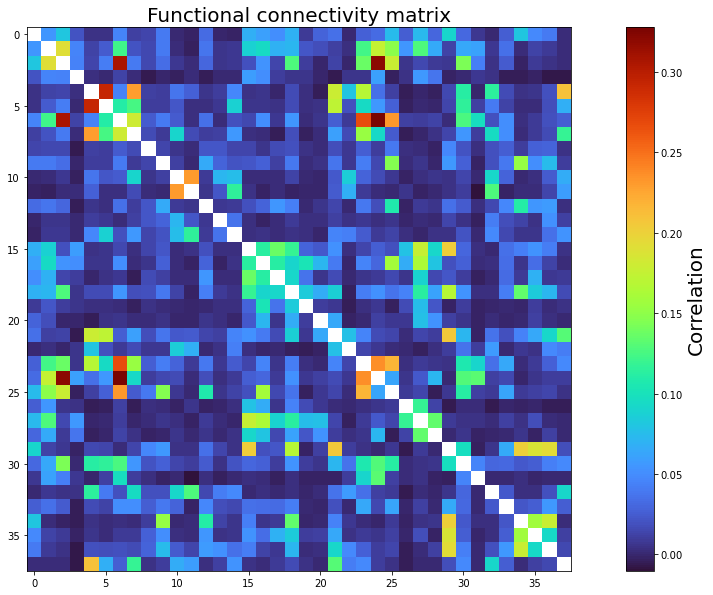

In [16]:
# Plot Simulated FCM
FCM_sim = np.genfromtxt(Sim_run_files[0],delimiter="\t")

# ListedColormap(turbo_colormap_data)
cs=plt.imshow(FCM_sim, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
plt.title('Functional connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Correlation', fontsize=20)
#plt.yticks([0,1,2,3])

Text(0.05, 0.95, 'SpearmanrResult(correlation=0.5006087933719512, pvalue=7.292661302531286e-46)')

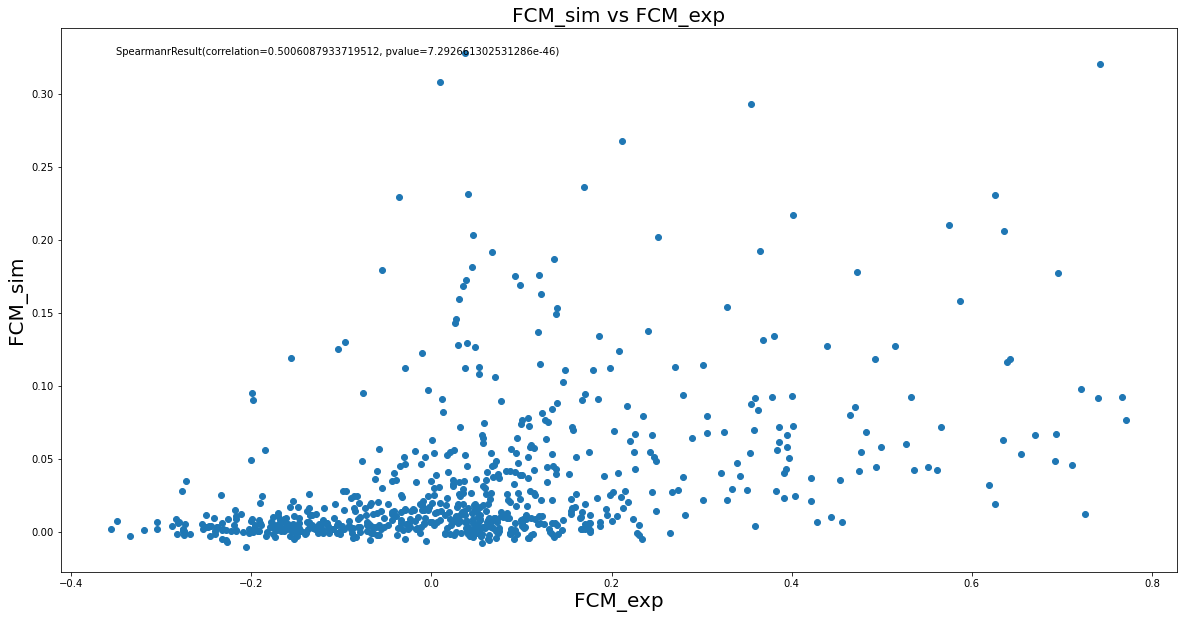

In [17]:
FCM_Exp_U = FCM_exp[np.triu_indices(FCM_exp.shape[0], k = 1)]
FCM_Sim_U = FCM_sim[np.triu_indices(FCM_sim.shape[0], k = 1)]

# Spearman Correlation
SCorr = stats.spearmanr(a=FCM_Exp_U,b=FCM_Sim_U)
#print(SCorr)

# Scatterplot
plt.scatter(FCM_Exp_U,FCM_Sim_U)
plt.xlabel('FCM_exp', fontsize=20)
plt.ylabel('FCM_sim', fontsize=20)
plt.title('FCM_sim vs FCM_exp', fontsize=20)
plt.annotate(SCorr, xy=(0.05, 0.95), xycoords='axes fraction')